In [71]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [72]:
df=pd.read_csv("googleplaystore.csv.zip")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [74]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [75]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [76]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
  #Looping through the data to find any missing values.

App - 0%
Category - 0%
Rating - 14%
Reviews - 0%
Size - 0%
Installs - 0%
Type - 0%
Price - 0%
Content Rating - 0%
Genres - 0%
Last Updated - 0%
Current Ver - 0%
Android Ver - 0%


In [77]:
df.isnull().sum()
#Counting the missing values in each column. There are 1474 in 'Rating', 1 in 'Type', 1 in 'Content Rating', 8 in 'Current Ver', and 3 in 'Android Ver'.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

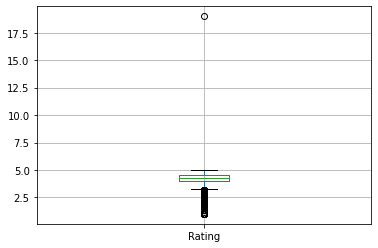

In [78]:
df.boxplot()
#Checking for outliers in the Rating Column.

In [79]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [80]:
df.drop([10472],inplace=True)
#Removing the outlier.

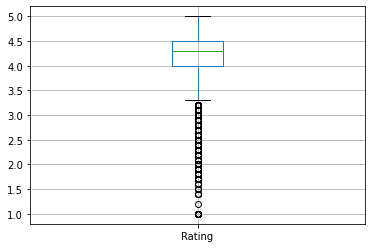

In [81]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48afea4990>]],
      dtype=object)

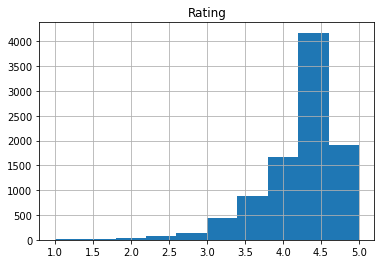

In [82]:
df.hist()

In [83]:
df.median(axis = 0, skipna = True)

Rating        4.3
Reviews    2094.0
dtype: float64

In [84]:
df['Rating'].fillna(value=4.3,inplace=True)

In [85]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [86]:
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())
print(df['Type'].mode())

0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    Free
dtype: object


In [87]:
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True) 

In [88]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [89]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
#Converting the non-numeric data types: 'Installs', 'Price', and 'Reviews' into numerical values in order to analyze the data.

In [90]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [91]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [92]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [93]:
def max_min_val(col):
    
    first = df[col].idxmax() 
    first_obs = pd.DataFrame(df.loc[first])
    
    last = df[col].idxmin()
    last_obs = pd.DataFrame(df.loc[last])
    
    min_max_obs = pd.concat([first_obs, last_obs], axis=1)
    
    return min_max_obs

In [94]:
max_min_val('Price')

,4367,0
App,I'm Rich - Trump Edition,Photo Editor & Candy Camera & Grid & ScrapBook
Category,LIFESTYLE,ART_AND_DESIGN
Rating,3.6,4.1
Reviews,275,159
Size,7.3M,19M
Installs,10000,10000
Type,Paid,Free
Price,400,0
Content Rating,Everyone,Everyone
Genres,Lifestyle,Art & Design


In [95]:
max_min_val('Rating')

,329,625
App,Hojiboy Tojiboyev Life Hacks,House party - live chat
Category,COMICS,DATING
Rating,5,1
Reviews,15,1
Size,37M,9.2M
Installs,1000,10
Type,Free,Free
Price,0,0
Content Rating,Everyone,Mature 17+
Genres,Comics,Dating


In [96]:
max_min_val('Reviews')

,2544,478
App,Facebook,Truth or Dare Pro
Category,SOCIAL,DATING
Rating,4.1,4.3
Reviews,78158306,0
Size,Varies with device,20M
Installs,1e+09,50
Type,Free,Paid
Price,0,1.49
Content Rating,Teen,Teen
Genres,Social,Dating


In [97]:
grp = df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
k = grp['Installs'].agg(np.mean)

print(x)
print(y)
print(z)
print(k)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

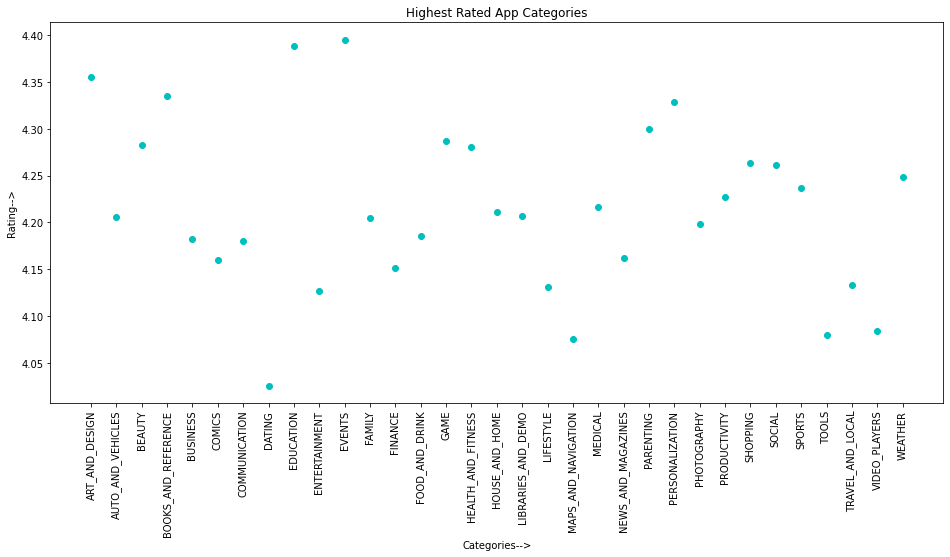

In [98]:
plt.figure(figsize=(16,7))
plt.plot(x,'ro', color='c')
plt.xticks(rotation=90)
plt.title('Highest Rated App Categories')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

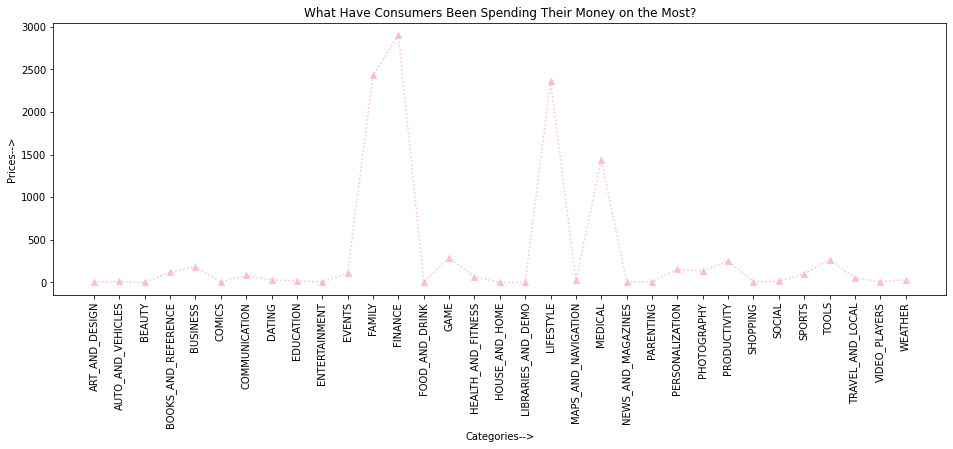

In [99]:
plt.figure(figsize=(16,5))
plt.plot(y,'^k:', color='pink')
plt.xticks(rotation=90)
plt.title('What Have Consumers Been Spending Their Money on the Most?')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

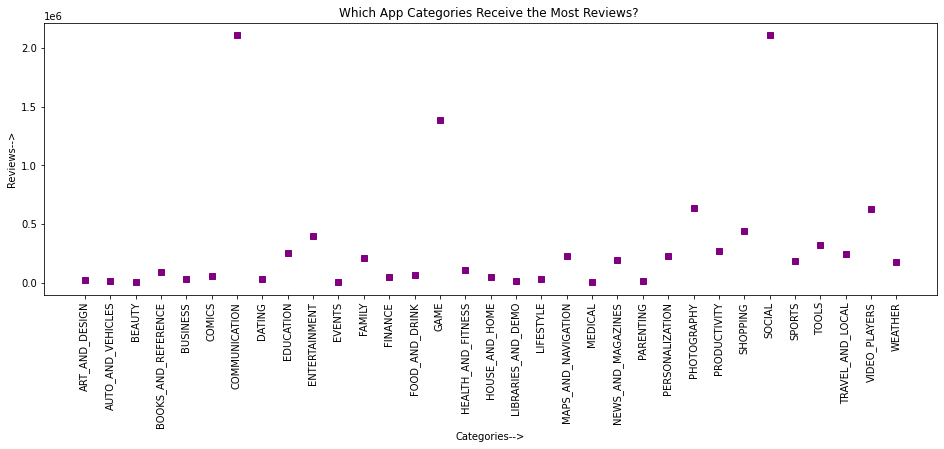

In [100]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='purple')
plt.xticks(rotation=90)
plt.title('Which App Categories Receive the Most Reviews? ')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

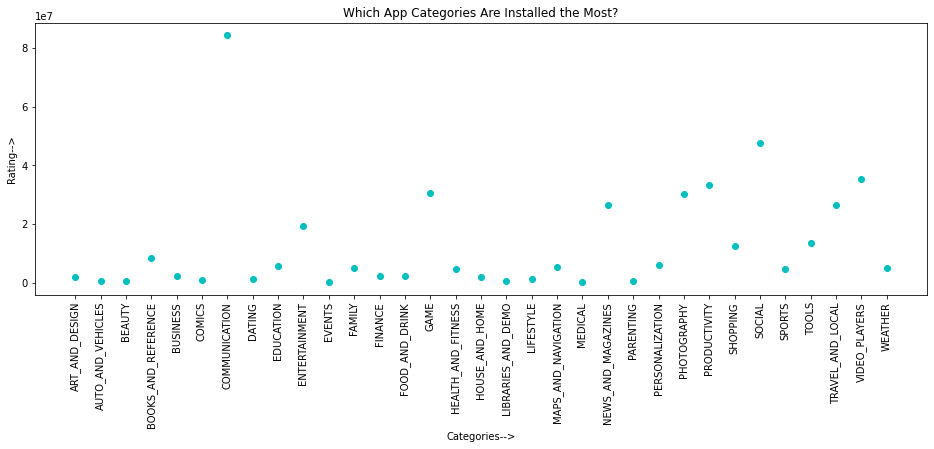

In [101]:
plt.figure(figsize=(16,5))
plt.plot(k,'bo', color='c')
plt.xticks(rotation=90)
plt.title('Which App Categories Are Installed the Most?')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()